In [75]:
# pip install --upgrade transformers torch tf-keras matplotlib seaborn nltk

In [29]:
from transformers import pipeline
import matplotlib.pyplot as plt
import seaborn as sns

In [31]:
from transformers import pipeline

sentiment_pipeline = pipeline("sentiment-analysis", framework="pt")  


No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
Device set to use mps:0


In [33]:
texts = [
    "AI is powerful!", 
    "I feel happy today.", 
    "Winters are the best", 
    "The weather is bad", 
    "I love coding!", 
    "I am feeling very sad and tired.",
    "This is amazing!", 
    "I hate waiting in long queues."
]

In [35]:
results = sentiment_pipeline(texts)

In [37]:
sentiments = []
scores = []
for result in results:
    sentiments.append(result["label"])
    scores.append(result["score"])

In [39]:
for text, sentiment, score in zip(texts, sentiments, scores):
    print(f"Text: {text}")
    print(f"Sentiment: {sentiment} (Confidence: {score:.4f})")
    print(" ")

Text: AI is powerful!
Sentiment: POSITIVE (Confidence: 0.9998)
 
Text: I feel happy today.
Sentiment: POSITIVE (Confidence: 0.9999)
 
Text: Winters are the best
Sentiment: POSITIVE (Confidence: 0.9996)
 
Text: The weather is bad
Sentiment: NEGATIVE (Confidence: 0.9998)
 
Text: I love coding!
Sentiment: POSITIVE (Confidence: 0.9998)
 
Text: I am feeling very sad and tired.
Sentiment: NEGATIVE (Confidence: 0.9997)
 
Text: This is amazing!
Sentiment: POSITIVE (Confidence: 0.9999)
 
Text: I hate waiting in long queues.
Sentiment: NEGATIVE (Confidence: 0.9968)
 


In [41]:
sentiment_map = {"POSITIVE": "Positive", "NEGATIVE": "Negative"}
sentiments = [sentiment_map[label] for label in sentiments]

In [43]:
sentiment_counts = {"Positive": sentiments.count("Positive"), "Negative": sentiments.count("Negative")}
print("Sentiment Counts:", sentiment_counts)
print("Type:", type(sentiment_counts))

Sentiment Counts: {'Positive': 5, 'Negative': 3}
Type: <class 'dict'>


/var/folders/3d/mm908rpn7wq_lxgldksg46fh0000gn/T/ipykernel_8440/96948248.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


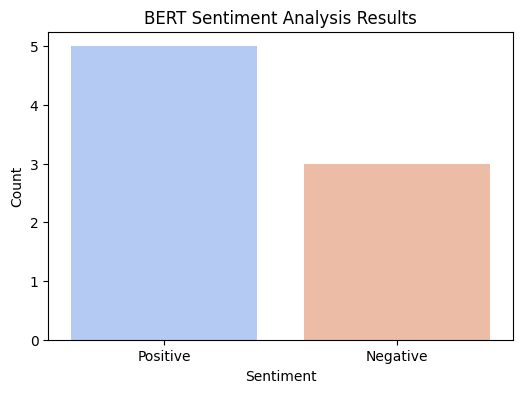

In [51]:
plt.figure(figsize=(6, 4))

sns.barplot(
    x=list(sentiment_counts.keys()),
    y=list(sentiment_counts.values()),  
    palette="coolwarm",
)

plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.title("BERT Sentiment Analysis Results")
plt.show()
